In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/dataset.csv')
print(df.shape)
print(df.info())

(26162717, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26162717 entries, 0 to 26162716
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90              

In [3]:
df.shape

(26162717, 61)

In [4]:
df.columns.to_list()

['id',
 'rn',
 'pre_since_opened',
 'pre_since_confirmed',
 'pre_pterm',
 'pre_fterm',
 'pre_till_pclose',
 'pre_till_fclose',
 'pre_loans_credit_limit',
 'pre_loans_next_pay_summ',
 'pre_loans_outstanding',
 'pre_loans_total_overdue',
 'pre_loans_max_overdue_sum',
 'pre_loans_credit_cost_rate',
 'pre_loans5',
 'pre_loans530',
 'pre_loans3060',
 'pre_loans6090',
 'pre_loans90',
 'is_zero_loans5',
 'is_zero_loans530',
 'is_zero_loans3060',
 'is_zero_loans6090',
 'is_zero_loans90',
 'pre_util',
 'pre_over2limit',
 'pre_maxover2limit',
 'is_zero_util',
 'is_zero_over2limit',
 'is_zero_maxover2limit',
 'enc_paym_0',
 'enc_paym_1',
 'enc_paym_2',
 'enc_paym_3',
 'enc_paym_4',
 'enc_paym_5',
 'enc_paym_6',
 'enc_paym_7',
 'enc_paym_8',
 'enc_paym_9',
 'enc_paym_10',
 'enc_paym_11',
 'enc_paym_12',
 'enc_paym_13',
 'enc_paym_14',
 'enc_paym_15',
 'enc_paym_16',
 'enc_paym_17',
 'enc_paym_18',
 'enc_paym_19',
 'enc_paym_20',
 'enc_paym_21',
 'enc_paym_22',
 'enc_paym_23',
 'enc_paym_24',
 'enc

In [5]:
# Во избежание проблем с памятью будем агрегировать датасет кусками:
#отдельно агрегируем небинаризованные колонки, отдельно, после OHE-кодирования, агрегируем бинаризованные
not_binary_cols = ['id', 'rn', 'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090',
 'is_zero_loans90', 'is_zero_util', 'is_zero_over2limit', 'is_zero_maxover2limit', 'pclose_flag', 'fclose_flag']

binary_cols = ['id','pre_since_opened', 'pre_since_confirmed', 'pre_pterm', 'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
 'pre_loans_credit_limit', 'pre_loans_next_pay_summ', 'pre_loans_outstanding', 'pre_loans_total_overdue', 'pre_loans_max_overdue_sum',
 'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_util',
 'pre_over2limit', 'pre_maxover2limit', 'pre_loans90','enc_paym_0', 'enc_paym_1', 'enc_paym_2', 'enc_paym_3',
 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11',
 'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18',
 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24', 'enc_loans_account_holder_type',
 'enc_loans_credit_status', 'enc_loans_credit_type', 'enc_loans_account_cur']

df_not_binary_cols = df[not_binary_cols]
df_not_binary_cols.to_csv('data/df_not_binary.csv', index = False)

In [6]:
df_binary_cols = df[binary_cols]
df_binary_cols.to_csv('data/df_binary.csv', index = False) 

In [1]:
import pandas as pd
dfnb = pd.read_csv('data/df_not_binary.csv')

In [2]:
# Аггрегировать небинаризованные данные будем по колонке ID; 
#для 'rn' будем брать максимальное значение (это будет количество взятых кредитов)
#для остальных колонок будем брать сумму (это флаги 1/0 для каждой заявки, поэтому такой подход сохраняет информацию)
cols_for_sum=[]
for i in dfnb.columns.to_list():
    if (i !='rn' and i !='id'):
        cols_for_sum.append(i)

In [3]:
def custom_aggregation(s):
    if s.name in cols_for_sum:
        return s.sum()
    else:
        return s.max()
    
dfnb_agg = dfnb.groupby('id').agg(custom_aggregation)
print(dfnb_agg.shape)
dfnb_agg.head()

(3000000, 11)


,rn,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,fclose_flag
id,,,,,,,,,,,
0,10,9,10,10,10,10,6,9,9,1,2
1,14,12,10,12,12,11,10,12,11,1,2
2,3,3,2,2,2,3,1,3,2,2,2
3,15,15,15,15,15,15,8,14,14,5,6
4,1,1,1,1,1,1,1,1,1,1,1


In [4]:
dfnb_agg['id'] = dfnb_agg.index

In [5]:
# Сохраним небинаризованные данные в отдельный датасет
dfnb_agg.to_csv('data/dfnb_agg.csv', index = False) 

In [1]:
# освободим память и посмотрим на бинаризованные фичи
import pandas as pd
dfb = pd.read_csv('data/df_binary.csv')

In [2]:
for col in dfb.columns:
    print(dfb[col].value_counts())

id
2891734    58
1782755    55
1658519    54
62963      51
508303     51
           ..
2349517     1
1108612     1
883552      1
1903673     1
2531540     1
Name: count, Length: 3000000, dtype: int64
pre_since_opened
13    1645938
0     1561873
6     1522882
10    1409770
8     1406244
18    1388400
14    1315095
9     1312790
7     1307521
1     1300842
2     1290724
4     1255220
11    1250266
19    1230414
3     1211933
17    1202495
16    1200566
5     1196677
15    1193193
12     959874
Name: count, dtype: int64
pre_since_confirmed
9     4909419
6     1948337
4     1514861
17    1503451
3     1435553
14    1410504
10    1361991
13    1313856
7     1291490
1     1245131
2     1239514
8     1234641
16    1213550
0     1192383
5     1180787
12    1108831
11    1058230
15        188
Name: count, dtype: int64
pre_pterm
4     4456185
14    2336504
2     1532229
17    1520418
1     1483207
16    1460983
11    1430459
9     1428200
6     1400005
7     1391864
0     1312386
13    1310140
8

In [3]:
# добавим target, чтобы посмотреть корреляцию
df_target = pd.read_csv('data/train_target.csv')
df_target = df_target.set_index('id')
dfb_with_target = dfb.join(df_target, on = 'id', how = 'inner')

In [4]:
dfb_with_target.to_csv('data/df_binary_with_target.csv', index = False) 

In [1]:
# снова освободим память (перезагрузим ядро)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfb_with_target = pd.read_csv('data/df_binary_with_target.csv')
dfb_with_target.head()

,id,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,flag
0,0,18,9,2,3,16,10,11,3,3,...,4,3,3,3,4,1,3,4,1,0
1,0,18,9,14,14,12,12,0,3,3,...,1,0,0,0,4,1,3,4,1,0
2,0,18,9,4,8,1,11,11,0,5,...,1,0,0,0,4,1,2,3,1,0
3,0,4,1,9,12,16,7,12,2,3,...,4,3,3,3,4,1,3,1,1,0
4,0,5,12,15,2,11,12,10,2,3,...,4,3,3,3,4,1,3,4,1,0


In [2]:
# посмотрим корреляцию фичей с таргетом
corrs={}
for col in dfb_with_target.columns:
    if col == 'flag':
        pass
    else:
        corrs[col] = dfb_with_target[col].corr(dfb_with_target['flag'])

corrs_sorted = sorted(corrs.items(), key=lambda item: item[1])
corrs_sorted

[('pre_util', -0.014639273858591956),
 ('pre_maxover2limit', -0.010724122882565364),
 ('pre_loans5', -0.007815072705598043),
 ('pre_pterm', -0.007797017310202694),
 ('pre_fterm', -0.007419107596369367),
 ('enc_loans_account_holder_type', -0.00735816666348511),
 ('pre_loans530', -0.00668175265153371),
 ('pre_loans_max_overdue_sum', -0.006497952180633937),
 ('pre_since_confirmed', -0.00478635275887263),
 ('enc_loans_credit_status', -0.003544824298354719),
 ('enc_loans_account_cur', -0.002974066757120974),
 ('pre_loans6090', -0.002793163476462354),
 ('pre_loans_next_pay_summ', -0.0008970854361928762),
 ('pre_loans_credit_cost_rate', 0.00036833916445123347),
 ('pre_loans_total_overdue', 0.001048040096831947),
 ('pre_till_pclose', 0.0017866278859480088),
 ('pre_since_opened', 0.002781074644126724),
 ('id', 0.003514008881946676),
 ('pre_till_fclose', 0.004941069412022006),
 ('pre_loans3060', 0.004957520046778081),
 ('pre_loans90', 0.006302067074621871),
 ('pre_over2limit', 0.0070231870569150

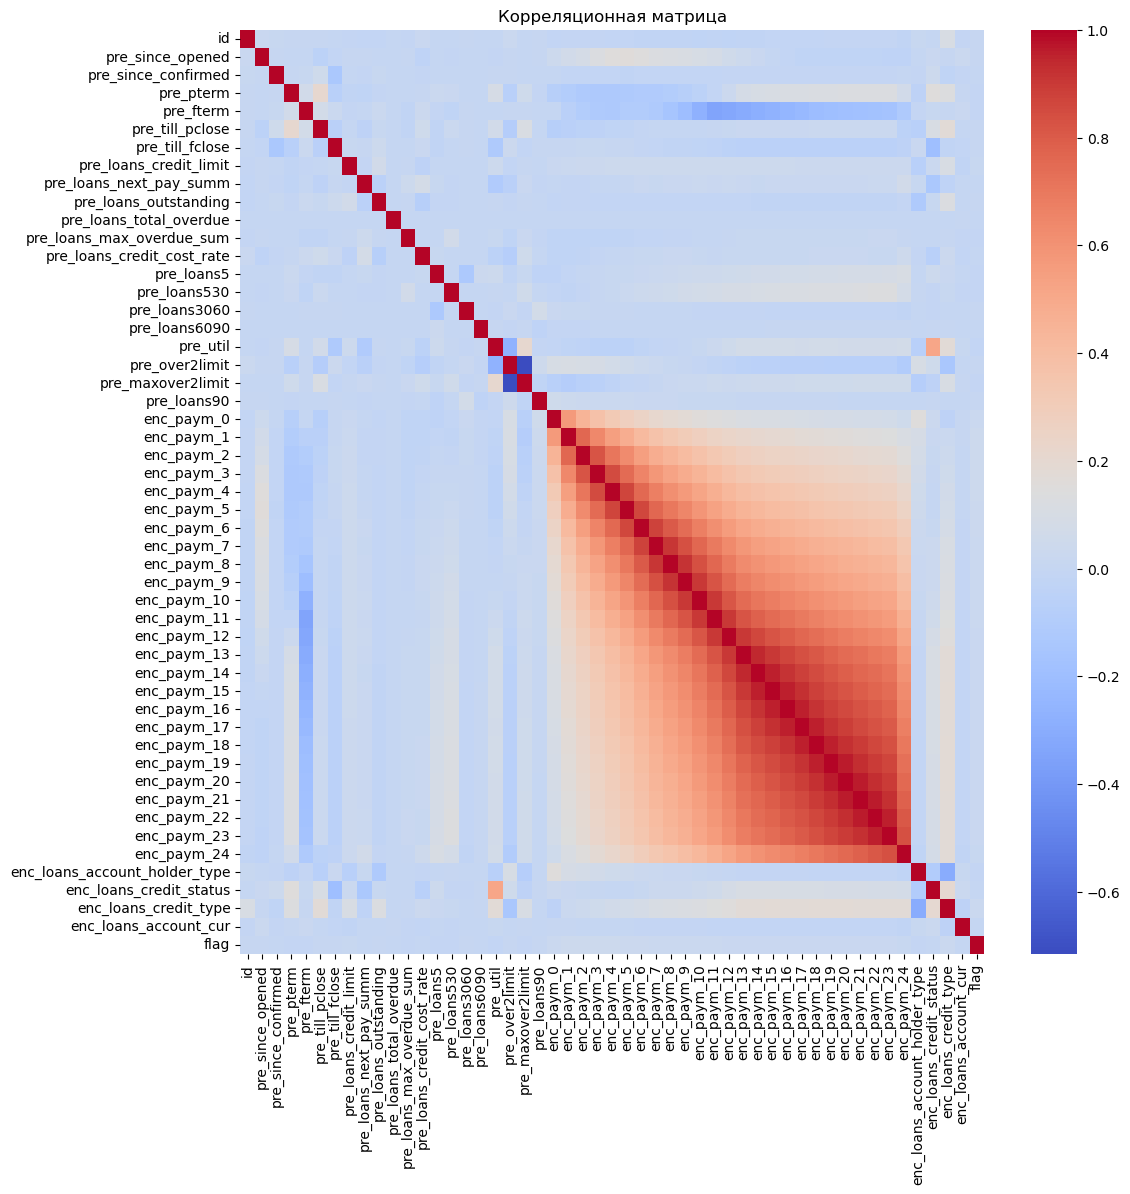

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dfb_with_target.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [4]:
# Разделим получившийся датасет на несколько частей, чтобы делать OHE-кодирование и агрегацию по частям
# flag пока не берем, потом проще будет его смерджить с уже готовым датасетом - он был нужен только для подсчета корреляций
dfb_short1 = dfb_with_target[dfb_with_target.columns.to_list()[0:5]] #ПЕРВЫЕ 5 колонок
dfb_short2 = dfb_with_target[['id']+dfb_with_target.columns.to_list()[5:10]] #вторые 5 колонок
dfb_short3 = dfb_with_target[['id']+dfb_with_target.columns.to_list()[10:20]]  
dfb_short4 = dfb_with_target[['id']+dfb_with_target.columns.to_list()[20:30]] 
dfb_short5 = dfb_with_target[['id']+dfb_with_target.columns.to_list()[30:40]] 
dfb_short6 = dfb_with_target[['id']+dfb_with_target.columns.to_list()[40:-1]] # остаток без flag

dfb_short1.to_csv('data/dfb1.csv', index = False) 
dfb_short2.to_csv('data/dfb2.csv', index = False) 
dfb_short3.to_csv('data/dfb3.csv', index = False)
dfb_short4.to_csv('data/dfb4.csv', index = False)
dfb_short5.to_csv('data/dfb5.csv', index = False)
dfb_short6.to_csv('data/dfb6.csv', index = False)

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

dfb1 = pd.read_csv('data/dfb1.csv')

# Преобразуем все колонки, кроме id , в int8
df_id = dfb1.id
dfb1=dfb1.drop('id', axis = 1)
dfb1=dfb1.astype('int8')
dfb1['id'] = df_id
dfb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26162717 entries, 0 to 26162716
Data columns (total 5 columns):
 #   Column               Dtype
---  ------               -----
 0   pre_since_opened     int8 
 1   pre_since_confirmed  int8 
 2   pre_pterm            int8 
 3   pre_fterm            int8 
 4   id                   int64
dtypes: int64(1), int8(4)
memory usage: 299.4 MB


In [2]:
categorical_features=dfb1.columns.to_list()[:-1]

ohe = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore',drop='first', min_frequency= 0.007)
ft = ohe.fit_transform(dfb1[categorical_features])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft=df_ft.astype('int8')

# разобьем датасет еще на два, чтобы он  помещался в память при агрегации
df_ft1 = df_ft[df_ft.columns.to_list()[0:35]]
df_ft2 = df_ft[df_ft.columns.to_list()[35:]]

df_ft1['id'] = df_id
df_ft2['id'] = df_id

df_ft1.to_csv('data/df_ft_ohe_1_1.csv', index = False)
df_ft2.to_csv('data/df_ft_ohe_1_2.csv', index = False)

C:\Users\Yana Eliseeva\AppData\Local\Temp\ipykernel_19188\1226903090.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ft1['id'] = df_id
C:\Users\Yana Eliseeva\AppData\Local\Temp\ipykernel_19188\1226903090.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ft2['id'] = df_id


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_ft_ohe_1_1 = pd.read_csv('data/df_ft_ohe_1_1.csv')
df_id = df_ft_ohe_1_1.id
df_ft_ohe_1_1=df_ft_ohe_1_1.drop('id', axis = 1)
df_ft_ohe_1_1=df_ft_ohe_1_1.astype('int8')
df_ft_ohe_1_1['id'] = df_id

dfb1_1_ohe_grouped = df_ft_ohe_1_1.groupby('id').agg(sum)
dfb1_1_ohe_grouped['id'] = dfb1_1_ohe_grouped.index
dfb1_1_ohe_grouped= dfb1_1_ohe_grouped.astype(int)
dfb1_1_ohe_grouped.to_csv('data/dfb1_1_ohe_grouped.csv', index = False) 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_ft_ohe_1_2 = pd.read_csv('data/df_ft_ohe_1_2.csv')
df_id = df_ft_ohe_1_2.id
df_ft_ohe_1_2=df_ft_ohe_1_2.drop('id', axis = 1)
df_ft_ohe_1_2=df_ft_ohe_1_2.astype('int8')
df_ft_ohe_1_2['id'] = df_id

dfb1_2_ohe_grouped = df_ft_ohe_1_2.groupby('id').agg(sum)
dfb1_2_ohe_grouped['id'] = dfb1_2_ohe_grouped.index
dfb1_2_ohe_grouped= dfb1_2_ohe_grouped.astype(int)
dfb1_2_ohe_grouped.to_csv('data/dfb1_2_ohe_grouped.csv', index = False) 

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

dfb2 = pd.read_csv('data/dfb2.csv')
# Преобразуем все колонки, кроме id , в int8
df_id = dfb2.id
dfb2=dfb2.drop('id', axis = 1)
dfb2=dfb2.astype('int8')
dfb2['id'] = df_id
dfb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26162717 entries, 0 to 26162716
Data columns (total 6 columns):
 #   Column                   Dtype
---  ------                   -----
 0   pre_till_pclose          int8 
 1   pre_till_fclose          int8 
 2   pre_loans_credit_limit   int8 
 3   pre_loans_next_pay_summ  int8 
 4   pre_loans_outstanding    int8 
 5   id                       int64
dtypes: int64(1), int8(5)
memory usage: 324.4 MB


In [2]:
categorical_features=dfb2.columns.to_list()[:-1]

ohe = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore',drop='first', min_frequency= 0.007)
ft = ohe.fit_transform(dfb2[categorical_features])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft=df_ft.astype('int8')
# разобьем датасет еще на два, чтобы он  помещался в память при агрегации
df_ft1 = df_ft[df_ft.columns.to_list()[0:35]]
df_ft2 = df_ft[df_ft.columns.to_list()[35:]]
df_ft1['id'] = df_id
df_ft2['id'] = df_id
df_ft1.to_csv('data/df_ft_ohe_2_1.csv', index = False)
df_ft2.to_csv('data/df_ft_ohe_2_2.csv', index = False)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_ft_ohe_2_1 = pd.read_csv('data/df_ft_ohe_2_1.csv')
df_id = df_ft_ohe_2_1.id
df_ft_ohe_2_1=df_ft_ohe_2_1.drop('id', axis = 1)
df_ft_ohe_2_1=df_ft_ohe_2_1.astype('int8')
df_ft_ohe_2_1['id'] = df_id
dfb2_1_ohe_grouped = df_ft_ohe_2_1.groupby('id').agg(sum)
dfb2_1_ohe_grouped['id'] = dfb2_1_ohe_grouped.index
dfb2_1_ohe_grouped= dfb2_1_ohe_grouped.astype(int)
dfb2_1_ohe_grouped.to_csv('data/dfb2_1_ohe_grouped.csv', index = False) 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_ft_ohe_2_2 = pd.read_csv('data/df_ft_ohe_2_2.csv')
df_id = df_ft_ohe_2_2.id
df_ft_ohe_2_2=df_ft_ohe_2_2.drop('id', axis = 1)
df_ft_ohe_2_2=df_ft_ohe_2_2.astype('int8')
df_ft_ohe_2_2['id'] = df_id
dfb2_2_ohe_grouped = df_ft_ohe_2_2.groupby('id').agg(sum)
dfb2_2_ohe_grouped['id'] = dfb2_2_ohe_grouped.index
dfb2_2_ohe_grouped= dfb2_2_ohe_grouped.astype(int)
dfb2_2_ohe_grouped.to_csv('data/dfb2_2_ohe_grouped.csv', index = False) 

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

dfb3 = pd.read_csv('data/dfb3.csv')

# Преобразуем все колонки, кроме id , в int8
df_id = dfb3.id
dfb3=dfb3.drop('id', axis = 1)
dfb3=dfb3.astype('int8')
dfb3['id'] = df_id

categorical_features=dfb3.columns.to_list()[:-1]

ohe = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore',drop='first', min_frequency= 0.007)
ft = ohe.fit_transform(dfb3[categorical_features])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft=df_ft.astype('int8')
df_ft['id'] = df_id
dfb3_ohe_grouped = df_ft.groupby('id').agg(sum)
dfb3_ohe_grouped['id'] = dfb3_ohe_grouped.index
print(dfb3_ohe_grouped.shape)
print(dfb3_ohe_grouped.info())

dfb3_ohe_grouped.to_csv('data/dfb3_ohe_grouped.csv', index = False) 

(3000000, 46)
<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 2999999
Data columns (total 46 columns):
 #   Column                                         Dtype
---  ------                                         -----
 0   pre_loans_total_overdue_infrequent_sklearn     int8 
 1   pre_loans_max_overdue_sum_2                    int8 
 2   pre_loans_max_overdue_sum_3                    int8 
 3   pre_loans_max_overdue_sum_infrequent_sklearn   int8 
 4   pre_loans_credit_cost_rate_1                   int8 
 5   pre_loans_credit_cost_rate_2                   int8 
 6   pre_loans_credit_cost_rate_3                   int8 
 7   pre_loans_credit_cost_rate_4                   int8 
 8   pre_loans_credit_cost_rate_5                   int8 
 9   pre_loans_credit_cost_rate_6                   int8 
 10  pre_loans_credit_cost_rate_7                   int8 
 11  pre_loans_credit_cost_rate_8                   int8 
 12  pre_loans_credit_cost_rate_9                   int8 
 13  pre

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

dfb4 = pd.read_csv('data/dfb4.csv')

# Преобразуем все колонки, кроме id , в int8
df_id = dfb4.id
dfb4=dfb4.drop('id', axis = 1)
dfb4=dfb4.astype('int8')
dfb4['id'] = df_id

categorical_features=dfb4.columns.to_list()[:-1]

ohe = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore',drop='first', min_frequency= 0.007)
ft = ohe.fit_transform(dfb4[categorical_features])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft=df_ft.astype('int8')
df_ft['id'] = df_id
dfb4_ohe_grouped = df_ft.groupby('id').agg(sum)
dfb4_ohe_grouped['id'] = dfb4_ohe_grouped.index
print(dfb4_ohe_grouped.shape)

dfb4_ohe_grouped.to_csv('data/dfb4_ohe_grouped.csv', index = False) 

(3000000, 29)


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

dfb5 = pd.read_csv('data/dfb5.csv')

# Преобразуем все колонки, кроме id , в int8
df_id = dfb5.id
dfb5=dfb5.drop('id', axis = 1)
dfb5=dfb5.astype('int8')
dfb5['id'] = df_id

categorical_features=dfb5.columns.to_list()[:-1]

ohe = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore',drop='first', min_frequency= 0.007)
ft = ohe.fit_transform(dfb5[categorical_features])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft=df_ft.astype('int8')
df_ft['id'] = df_id
dfb5_ohe_grouped = df_ft.groupby('id').agg(sum)
dfb5_ohe_grouped['id'] = dfb5_ohe_grouped.index
print(dfb5_ohe_grouped.shape)

dfb5_ohe_grouped.to_csv('data/dfb5_ohe_grouped.csv', index = False) 

(3000000, 31)


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

dfb6 = pd.read_csv('data/dfb6.csv')

# Преобразуем все колонки, кроме id , в int8
df_id = dfb6.id
dfb6=dfb6.drop('id', axis = 1)
dfb6=dfb6.astype('int8')
dfb6['id'] = df_id

categorical_features=dfb6.columns.to_list()[:-1]

ohe = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore',drop='first', min_frequency= 0.007)
ft = ohe.fit_transform(dfb6[categorical_features])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft=df_ft.astype('int8')
df_ft['id'] = df_id
dfb6_ohe_grouped = df_ft.groupby('id').agg(sum)
dfb6_ohe_grouped['id'] = dfb6_ohe_grouped.index
print(dfb6_ohe_grouped.shape)
print(dfb6_ohe_grouped.info())
dfb6_ohe_grouped.to_csv('data/dfb6_ohe_grouped.csv', index = False) 

(3000000, 32)
<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                                            Dtype
---  ------                                            -----
 0   enc_paym_19_1                                     int8 
 1   enc_paym_19_3                                     int8 
 2   enc_paym_19_infrequent_sklearn                    int8 
 3   enc_paym_20_2                                     int8 
 4   enc_paym_20_4                                     int8 
 5   enc_paym_20_infrequent_sklearn                    int8 
 6   enc_paym_21_1                                     int8 
 7   enc_paym_21_3                                     int8 
 8   enc_paym_21_infrequent_sklearn                    int8 
 9   enc_paym_22_1                                     int8 
 10  enc_paym_22_3                                     int8 
 11  enc_paym_22_infrequent_sklearn                    int8 
 12  enc_paym_23_1      

In [1]:
# Теперь нужно соединить получившиеся агрегированные датасеты между собой и с target
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dfb1_1 = pd.read_csv('data/dfb1_1_ohe_grouped.csv')
dfb1_2 = pd.read_csv('data/dfb1_2_ohe_grouped.csv')
dfb2_1 = pd.read_csv('data/dfb2_1_ohe_grouped.csv')
dfb2_2 = pd.read_csv('data/dfb2_2_ohe_grouped.csv')

dfb1_1 = dfb1_1.set_index('id')
df2= dfb1_2.join(dfb1_1, on = 'id', how = 'inner')
df2 = df2.set_index('id')
df3= dfb2_1.join(df2, on = 'id', how = 'inner')
df3 = df3.set_index('id')
df4= dfb2_2.join(df3, on = 'id', how = 'inner')
df4 = df4.set_index('id')
df4.to_csv('data/dfb1-2joined.csv', index = False) 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dfb3 = pd.read_csv('data/dfb3_ohe_grouped.csv')
dfb4 = pd.read_csv('data/dfb4_ohe_grouped.csv')
dfb5 = pd.read_csv('data/dfb5_ohe_grouped.csv')
dfb6 = pd.read_csv('data/dfb6_ohe_grouped.csv')
df4 = pd.read_csv('data/dfb1-2joined.csv')
df5= dfb3.join(df4, on = 'id', how = 'inner')
df5 = df5.set_index('id')
df6= dfb4.join(df5, on = 'id', how = 'inner')
df6 = df6.set_index('id')
df7= dfb5.join(df6, on = 'id', how = 'inner')
df7 = df7.set_index('id')
df7.to_csv('data/dfb1-5joined.csv', index = False) 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dfb6 = pd.read_csv('data/dfb6_ohe_grouped.csv')
df3_5 = pd.read_csv('data/dfb1-5joined.csv')
dfnb = pd.read_csv('data/dfnb_agg.csv')
df_target = pd.read_csv('data/train_target.csv')

dfb_all = dfb6.join(df3_5, on = 'id', how = 'inner')
dfb_all = dfb_all.set_index('id')
df_all = dfnb.join(dfb_all, on = 'id', how = 'inner')
df_all = df_all.set_index('id')
df_done= df_target.join(df_all, on = 'id', how = 'inner')
print(df_done.shape)
df_done.head()
df_done.to_csv('data/df_done.csv', index = False)

(3000000, 276)
